In [50]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [15]:
data=datasets.load_breast_cancer()
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [22]:
X_train , X_test , Y_train , Y_test =train_test_split(data.data , data.target , test_size=0.25, random_state=1)

In [34]:
obj=KNeighborsClassifier()
obj.fit(X_train,Y_train)
Y_train_pred=obj.predict(X_train)
Y_test_pred=obj.predict(X_test)
obj.score(X_test,Y_test)

0.9370629370629371

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,Y_train_pred)

array([[142,  15],
       [ 11, 258]], dtype=int64)

In [41]:
confusion_matrix(Y_test,Y_test_pred)

array([[50,  5],
       [ 4, 84]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       157
           1       0.95      0.96      0.95       269

   micro avg       0.94      0.94      0.94       426
   macro avg       0.94      0.93      0.93       426
weighted avg       0.94      0.94      0.94       426



In [46]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.94      0.95      0.95        88

   micro avg       0.94      0.94      0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



# Apply CrossValidation For Finding K

In [51]:
X=[]
Y=[]
for i in range(1,26,2):
    clf1=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf1,X_train,Y_train)
    X.append(i)
    Y.append(score.mean())

    

C:\Users\Abhishek Mishra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Abhishek Mishra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Abhishek Mishra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Abhishek Mishra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 

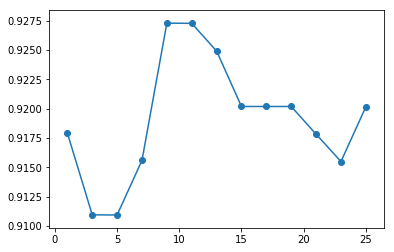

In [59]:
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.scatter(X,Y)
plt.show()